### Pandas Project 4

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [35]:
pd.set_option('display.max_columns', 200)

In [36]:
data = pd.read_csv(r'F:\Pandas Project 2024\Pandas DataSets\train.csv')

In [37]:
# 1: Check the first 2 rows
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [38]:
# 2: Check the last row
data.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
# 3: Find the shape 
data.shape

(891, 12)

In [40]:
# second way
print((data.index.stop,len(data.columns)))


(891, 12)


In [41]:
# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
# 5. Get Overall Statistics About The Dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
# 6: Data Filtering: how to select cols and rows form data set
# to select 1 col we have
data['Name']      # This is how we choose 1 col


# But for chosing more than 1 col we have to enslist them in pytohon list
data[['Name', 'Sex','Age']]    # here is a list of list

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [44]:
# More to Data Filtering

In [45]:
# Check the male and female 
print("Number of Male in the ship: ",sum(data['Sex'] == 'male'))
print("Number of Female in the ship: ",sum(data['Sex'] == 'female'))

Number of Male in the ship:  577
Number of Female in the ship:  314


In [46]:
# Check the data of Single Male 
data[data['Sex'] == 'male'].head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [47]:
# Check how many of them survive
print("The Survived are: ",sum(data['Survived'] == 1))

The Survived are:  342


In [48]:
# The number of poeple survived Male and Female
data[data['Survived'] == 1]['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [49]:
# Check the null values in the dataset
data.isnull().sum()     # 3 cols have null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

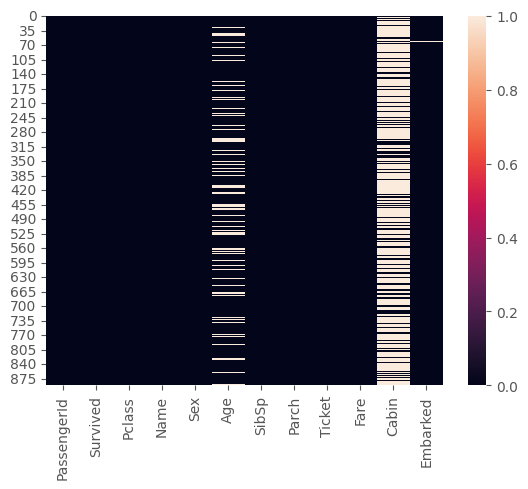

In [50]:
# Visualize the heatmap to check the null values
sns.heatmap(data.isnull())      # Cabin has more null values than Age and Embarked

In [51]:
# we can calculate the percentage of null values as well

percentage = data.isnull().sum()/len(data) * 100

In [52]:
percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [53]:
# Cabin has a lot of null values so let's drop it
data.drop('Cabin',axis = 1,inplace = True)

In [54]:
# Now we need to fill the NaN in the age and Embark cols

# To fill the age columns we can fill it with mean() value

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [55]:
# WE can fill the Emabar Column with high repetative value
print("Before Filling: ", data['Embarked'].value_counts() )  # S is the highest value so let's fill the NaN with it

data ['Embarked']   =  data['Embarked'].fillna("S")
print("After Filling: ", data['Embarked'].value_counts())    # By Comparing with the above data 2 entires has been added to S

Before Filling:  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
After Filling:  Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


### Categorical Data Encoding: 

#### The strings columns can not be used for analysis purpose that's why we convert them into numeric data via encoding

In [56]:
# First Lets Check the Sex coloumn
data['Sex'].unique()      # We can map them to 1 and 0 for male and female
data['Encoded_Sex'] = data['Sex'].map({'male':1,'female':0})

#### How to insert a column at specific location/ index


In [57]:
# for adding new col at index we use insert(loc, col_Name, Expression). taking 3 arguments. 
exp = data['Sex'].map({'male':1,'female':0})
data.insert(5,"Gender",exp)

In [58]:
# Now we need to Replace the Embarked column by integer
data['Embarked'].unique()   # It has 3 categories

array(['S', 'C', 'Q'], dtype=object)

In [74]:
data1 = pd.get_dummies(data,columns = ['Embarked'],drop_first = True)


# the embarked col is of Boolien type. To convet is into in we can use astype()
data1[['Embarked_Q', 'Embarked_S']] = data1[['Embarked_Q', 'Embarked_S']].astype(int)
data1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender,Age,SibSp,Parch,Ticket,Fare,Encoded_Sex,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,1,0,1


### Univiriate Analysis

In [60]:
# One varible/categorical data will be analyised
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

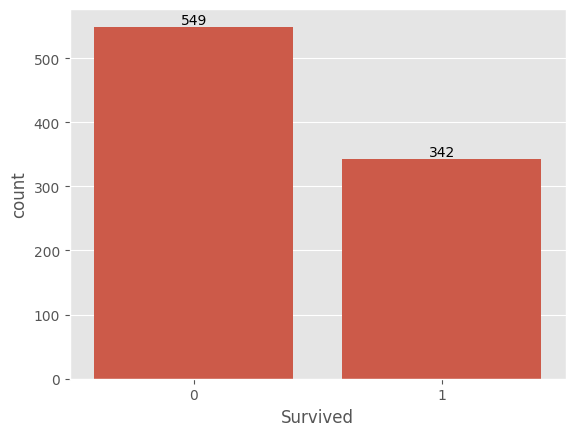

In [82]:
ax = sns.countplot(x = data['Survived'])
for labels in ax.containers:
    ax.bar_label(labels)

In [77]:
# How many Passanger were in first 2nd and 3rd Class
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

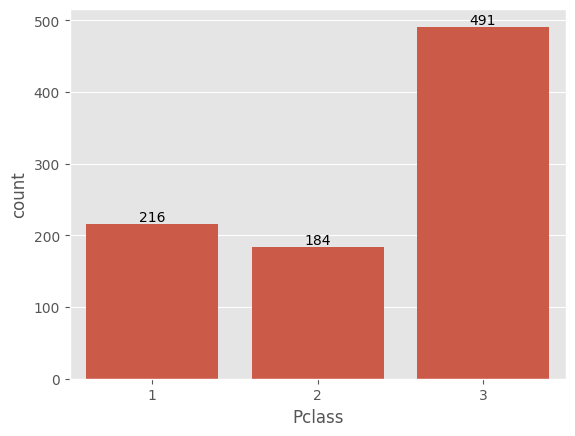

In [89]:
# Creating the countplot with hue
ax = sns.countplot(x='Pclass', data=data)
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()


In [126]:
data1['Alive_Female'] = data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Sex']


In [130]:
data1['Alive_Male'] = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Sex']


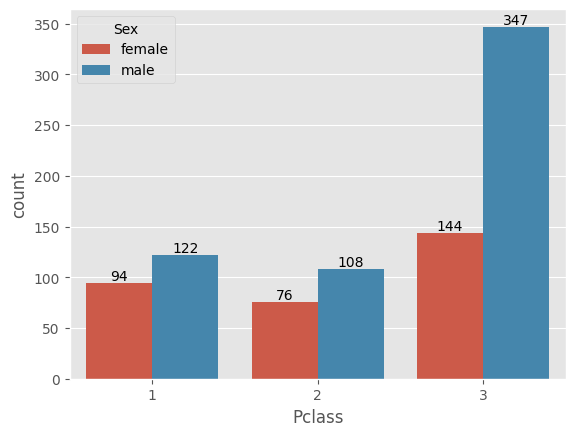

In [141]:
# the plot gives info about people who belongs to 1 class both male and female are shown on a different color.
ax = sns.countplot(x = data1['Pclass'],hue = data1['Sex'])
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()

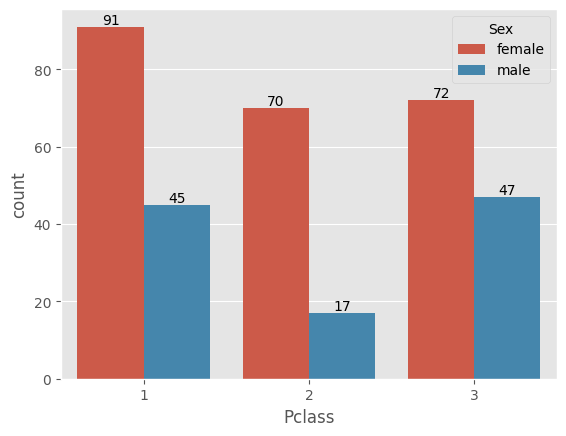

In [147]:
# To show how many people were alived from the different classes. We can't do this directly. Wo we need to get the data of those males
# and females we need to change the data. So we got only that data where all the people were alive
survived_data = data1[data1['Survived'] == 1]
# Create a countplot with hue for Sex
ax = sns.countplot(x='Pclass', hue='Sex', data=survived_data)
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()

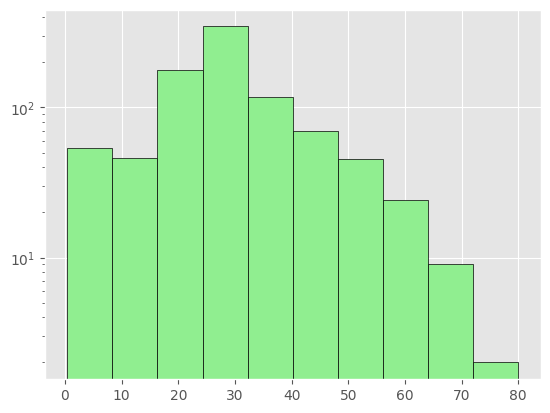

In [158]:
# Total number of male and Female and to check the age as well
data['Sex'].value_counts()
data['Age'].hist(edgecolor = 'k',color = 'lightgreen',log = True)
plt.show()

<Axes: ylabel='Age'>

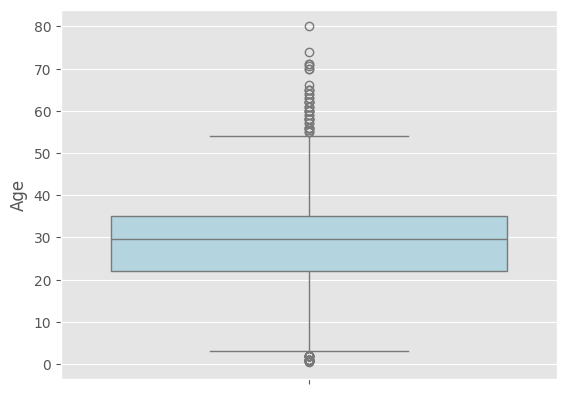

In [157]:
sns.boxplot(data['Age'],color = 'lightblue')

### Bivariate Analysis


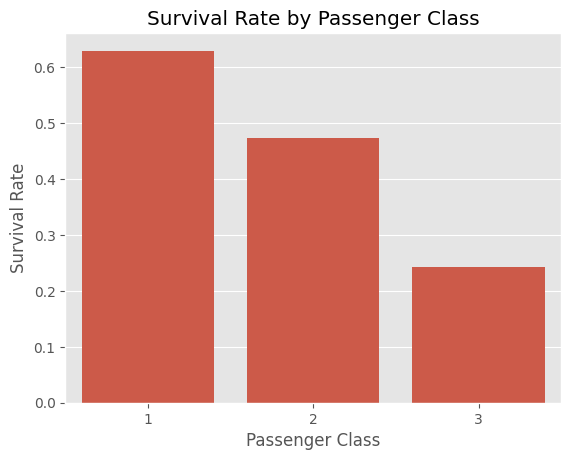

In [160]:
# Survival Rate by Class

# Calculate survival rate by class
class_survival_rate = data1.groupby('Pclass')['Survived'].mean().reset_index()

# Create a bar plot of survival rates by class
sns.barplot(x='Pclass', y='Survived', data=class_survival_rate)

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

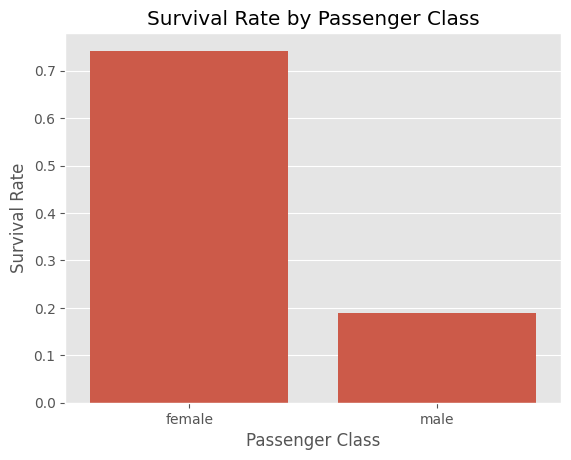

In [162]:
# Survival Rate by Sex

# Calculate survival rate by class
Sex_survival_rate = data1.groupby('Sex')['Survived'].mean().reset_index()

# Create a bar plot of survival rates by class
sns.barplot(x='Sex', y='Survived', data=Sex_survival_rate)

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\Ozair Khan\AppData\Local\Temp\ipykernel_2976\2623133718.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_survival_rate = data1.groupby('FareGroup')['Survived'].mean().reset_index()


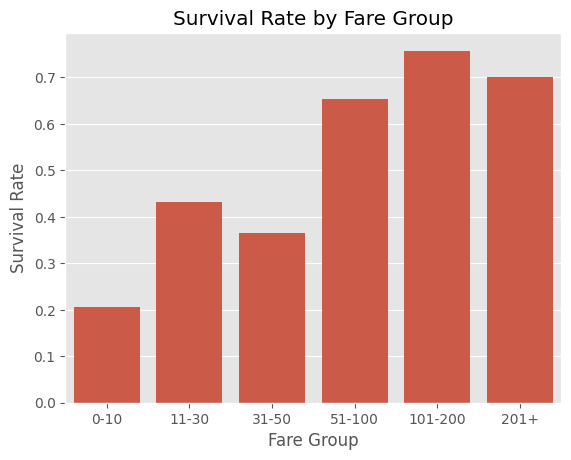

In [166]:
# Surviva rate by Fare
# Define fare bins
fare_bins = [0, 10, 30, 50, 100, 200, 1000]
fare_labels = ['0-10', '11-30', '31-50', '51-100', '101-200', '201+']
data1['FareGroup'] = pd.cut(data1['Fare'], bins=fare_bins, labels=fare_labels)

# Calculate survival rate by fare group
fare_group_survival_rate = data1.groupby('FareGroup')['Survived'].mean().reset_index()

# Create a bar plot of survival rates by fare group
sns.barplot(x='FareGroup', y='Survived', data=fare_group_survival_rate)

plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Ozair Khan\AppData\Local\Temp\ipykernel_2976\1973392860.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = data1.groupby('AgeGroup')['Survived'].mean().reset_index()


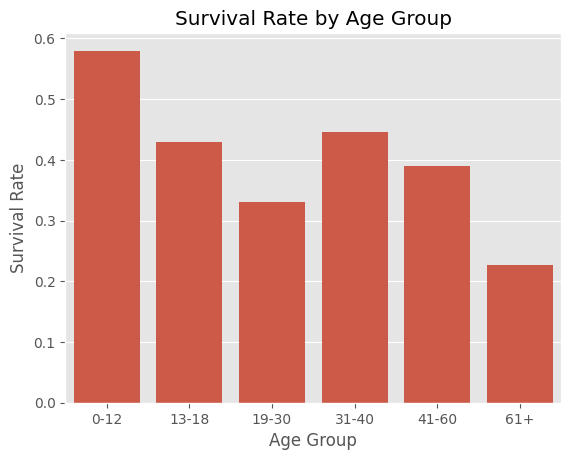

In [169]:
# By Age Groups
# Define age bins
bins = [0, 12, 18, 30, 40, 60, 100]
labels = ['0-12', '13-18', '19-30', '31-40', '41-60', '61+']
data1['AgeGroup'] = pd.cut(data1['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
age_group_survival_rate = data1.groupby('AgeGroup')['Survived'].mean().reset_index()

# Create a bar plot of survival rates by age group
sns.barplot(x='AgeGroup', y='Survived', data=age_group_survival_rate)

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


### Featuring Engineering

In [171]:
# To make a Family from the two classes
data1['Family'] = data['SibSp'] + data['Parch']

In [174]:
# Now we can easily find the Fare per person

data1['Fare_Per_Person'] = data1['Fare']/data1['Family']

,PassengerId,Survived,Pclass,Name,Sex,Gender,Age,SibSp,Parch,Ticket,Fare,Encoded_Sex,Embarked_Q,Embarked_S,Alive_Female,Alive_Male,FareGroup,AgeGroup,Family,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,1,0,1,NaN,NaN,0-10,19-30,1,7.25
